In [1]:
import pandas as pd

# Load the dataset
columns = ["sentiment", "id", "date", "query", "user", "text"]
data = pd.read_csv("sentiment140.csv", encoding="ISO-8859-1", names=columns)

# Keep only relevant columns
data = data[["sentiment", "text"]]

# Map sentiment labels: 0 (negative), 2 (neutral), 4 (positive) -> (-1, 0, 1)
sentiment_map = {0: -1, 2: 0, 4: 1}
data["sentiment"] = data["sentiment"].map(sentiment_map)

print(data.head())


   sentiment                                               text
0         -1  @switchfoot http://twitpic.com/2y1zl - Awww, t...
1         -1  is upset that he can't update his Facebook by ...
2         -1  @Kenichan I dived many times for the ball. Man...
3         -1    my whole body feels itchy and like its on fire 
4         -1  @nationwideclass no, it's not behaving at all....


In [2]:
import nltk


nltk.download('punkt', force=True)


[nltk_data] Downloading package punkt to C:\Users\SHAH
[nltk_data]     COMPUTERS\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt.zip.


True

In [3]:
import nltk

# Specify the directory where NLTK should look for data
nltk.data.path.append('/root/nltk_data')

# Download punkt again
nltk.download('punkt')


[nltk_data] Downloading package punkt to C:\Users\SHAH
[nltk_data]     COMPUTERS\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [4]:
import nltk
nltk.download('punkt')
nltk.download('stopwords')


[nltk_data] Downloading package punkt to C:\Users\SHAH
[nltk_data]     COMPUTERS\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to C:\Users\SHAH
[nltk_data]     COMPUTERS\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [5]:
def simple_tokenizer(tweet):
    # Check if tweet is not empty or NaN
    if not isinstance(tweet, str) or tweet.strip() == "":
        return ""

    # Remove URLs, mentions, hashtags, and special characters
    tweet = re.sub(r"http\S+|www\S+|https\S+", "", tweet)
    tweet = re.sub(r"@\w+|#\w+", "", tweet)
    tweet = re.sub(r"[^A-Za-z\s]", "", tweet)

    # Convert to lowercase and split into words
    tokens = tweet.lower().split()

    # Remove stopwords
    stop_words = set(stopwords.words("english"))
    filtered_tokens = [word for word in tokens if word not in stop_words]

    return " ".join(filtered_tokens)


In [6]:
!pip install emoji==2.2.0

In [7]:
import emoji

# Step 1: Ensure 'cleaned_text' column exists
if "cleaned_text" not in data.columns:
    data["cleaned_text"] = data["text"].fillna("")  # Initialize with the 'text' column or empty strings

# Step 2: Translate emojis to text
def translate_emojis(tweet):
    """Convert emojis in the tweet to their textual representation."""
    return emoji.demojize(tweet)

data["cleaned_text"] = data["cleaned_text"].apply(translate_emojis)

# Debugging: Check if emojis were converted
print("After Emoji Translation:")
print(data["cleaned_text"].head())

# Step 3: Replace slang
slang_dict = {"u": "you", "r": "are", "gr8": "great"}

def replace_slang(tweet):
    """Replace slang words in the tweet based on a predefined slang dictionary."""
    words = tweet.split()
    return " ".join([slang_dict.get(word, word) for word in words])

data["cleaned_text"] = data["cleaned_text"].apply(replace_slang)

# Debugging: Check if slang was replaced
print("\nAfter Slang Replacement:")
print(data["cleaned_text"].head())


After Emoji Translation:
0    @switchfoot http://twitpic.com/2y1zl - Awww, t...
1    is upset that he can't update his Facebook by ...
2    @Kenichan I dived many times for the ball. Man...
3      my whole body feels itchy and like its on fire 
4    @nationwideclass no, it's not behaving at all....
Name: cleaned_text, dtype: object

After Slang Replacement:
0    @switchfoot http://twitpic.com/2y1zl - Awww, t...
1    is upset that he can't update his Facebook by ...
2    @Kenichan I dived many times for the ball. Man...
3       my whole body feels itchy and like its on fire
4    @nationwideclass no, it's not behaving at all....
Name: cleaned_text, dtype: object


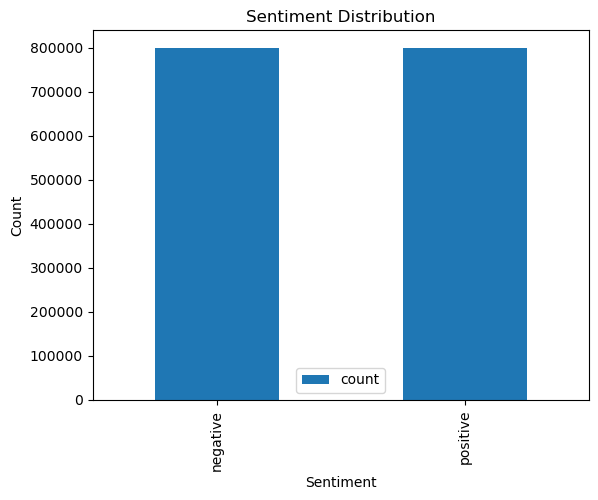

In [8]:
import matplotlib.pyplot as plt

# Plot sentiment distribution
data["sentiment"].value_counts().plot(kind="bar")
plt.title("Sentiment Distribution")
plt.xlabel("Sentiment")
plt.ylabel("Count")
plt.legend()
plt.xticks([0,1], ['negative','positive'])
plt.show()

In [9]:
data.to_csv("processed_sentiment140.csv", index=False)

Loading Preprocessed Data

In [10]:
import pandas as pd

# Load the processed dataset
data = pd.read_csv("processed_sentiment140.csv")

# Ensure the dataset has the necessary columns
print(data.head(5))

   sentiment                                               text  \
0         -1  @switchfoot http://twitpic.com/2y1zl - Awww, t...   
1         -1  is upset that he can't update his Facebook by ...   
2         -1  @Kenichan I dived many times for the ball. Man...   
3         -1    my whole body feels itchy and like its on fire    
4         -1  @nationwideclass no, it's not behaving at all....   

                                        cleaned_text  
0  @switchfoot http://twitpic.com/2y1zl - Awww, t...  
1  is upset that he can't update his Facebook by ...  
2  @Kenichan I dived many times for the ball. Man...  
3     my whole body feels itchy and like its on fire  
4  @nationwideclass no, it's not behaving at all....  


In [11]:
# Verify class distribution
print(data["sentiment"].value_counts())

# Split into features and labels
X = data["cleaned_text"]  # Features (cleaned tweets)
y = data["sentiment"]     # Labels (-1, 0, 1)

sentiment
-1    800000
 1    800000
Name: count, dtype: int64


Train Ensemble Learning Models

In [12]:
# Check for NaN values
print(X.isnull().sum())

0


In [13]:
# Display rows with missing values
print(X[X.isnull()])

Series([], Name: cleaned_text, dtype: object)


In [14]:
X = X.dropna()
y = y[X.index]  # Ensure labels (y) match the updated index


In [15]:
X = X.fillna("")


In [16]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Convert text to numerical features using TF-IDF
vectorizer = TfidfVectorizer(max_features=10000)  # Limit features to top 5000 terms
X_tfidf = vectorizer.fit_transform(X)

# Check the shape of the resulting feature matrix
print(X_tfidf.shape)


(1600000, 10000)


Split Data into Training and Testing Sets

In [17]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
# Reduce dataset size 
reduced_data = data.sample(frac=0.4, random_state=42)

# Separate features and labels
X_reduced = reduced_data["cleaned_text"]
y_reduced = reduced_data["sentiment"]

# Vectorize the reduced dataset
X_tfidf_reduced = vectorizer.fit_transform(X_reduced)

# Split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X_tfidf_reduced, y_reduced, test_size=0.2, random_state=42)

print(X_train.shape, X_test.shape)  # Check the split sizes


(512000, 10000) (128000, 10000)


 Train Random Forest Model

In [18]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score

# Train Random Forest Classifier
rf_model = RandomForestClassifier(class_weight='balanced',n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Evaluate the model
y_pred = rf_model.predict(X_test)
print("Random Forest Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))


Random Forest Accuracy: 0.780234375
              precision    recall  f1-score   support

          -1       0.77      0.80      0.78     63910
           1       0.79      0.76      0.78     64090

    accuracy                           0.78    128000
   macro avg       0.78      0.78      0.78    128000
weighted avg       0.78      0.78      0.78    128000



 Train XGBoost Model

In [19]:
# Map labels from [-1, 1] to [0, 1]
y_train_mapped = y_train.map({-1: 0, 1: 1})
y_test_mapped = y_test.map({-1: 0, 1: 1})

# Train XGBoost Classifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report

xgb_model = XGBClassifier(scale_pos_weight=1.5, use_label_encoder=False, eval_metric="logloss")
xgb_model.fit(X_train, y_train_mapped)

# Evaluate the model
y_pred_xgb = xgb_model.predict(X_test)
print("XGBoost Accuracy:", accuracy_score(y_test_mapped, y_pred_xgb))
print(classification_report(y_test_mapped, y_pred_xgb))



C:\Users\SHAH COMPUTERS\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [22:00:20] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


XGBoost Accuracy: 0.73428125
              precision    recall  f1-score   support

           0       0.84      0.58      0.69     63910
           1       0.68      0.89      0.77     64090

    accuracy                           0.73    128000
   macro avg       0.76      0.73      0.73    128000
weighted avg       0.76      0.73      0.73    128000



In [37]:
from sklearn.ensemble import VotingClassifier
from sklearn.metrics import accuracy_score, classification_report

# Reduce dataset size for fitting
X_train_sample = X_train[:50000]  # Use smaller training data
y_train_sample = y_train_mapped[:50000]

# Use hard voting for faster predictions
voting_clf = VotingClassifier(estimators=[
    ('rf', rf_model),  # Pre-trained Random Forest
    ('xgb', xgb_model)  # Pre-trained XGBoost
], voting='hard')

# Fit the VotingClassifier on the smaller dataset
voting_clf.fit(X_train_sample, y_train_sample)

# Predict on the full test set
y_pred_voting = voting_clf.predict(X_test)

# Evaluate the VotingClassifier
print("Voting Classifier Accuracy:", accuracy_score(y_test_mapped, y_pred_voting))
print("Classification Report:\n", classification_report(y_test_mapped, y_pred_voting))


C:\Users\SHAH COMPUTERS\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [23:58:36] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Voting Classifier Accuracy: 0.758328125
Classification Report:
               precision    recall  f1-score   support

           0       0.74      0.79      0.76     63910
           1       0.78      0.73      0.75     64090

    accuracy                           0.76    128000
   macro avg       0.76      0.76      0.76    128000
weighted avg       0.76      0.76      0.76    128000



In [26]:
import joblib

# Save the model
joblib.dump(rf_model, "randomforest_sentiment_model.pkl")
print("Model saved as randomforest_sentiment_model.pkl")


Model saved as randomforest_sentiment_model.pkl


In [27]:
# Load the saved model
rf_model = joblib.load("randomforest_sentiment_model.pkl")
print("Model loaded successfully")


Model loaded successfully


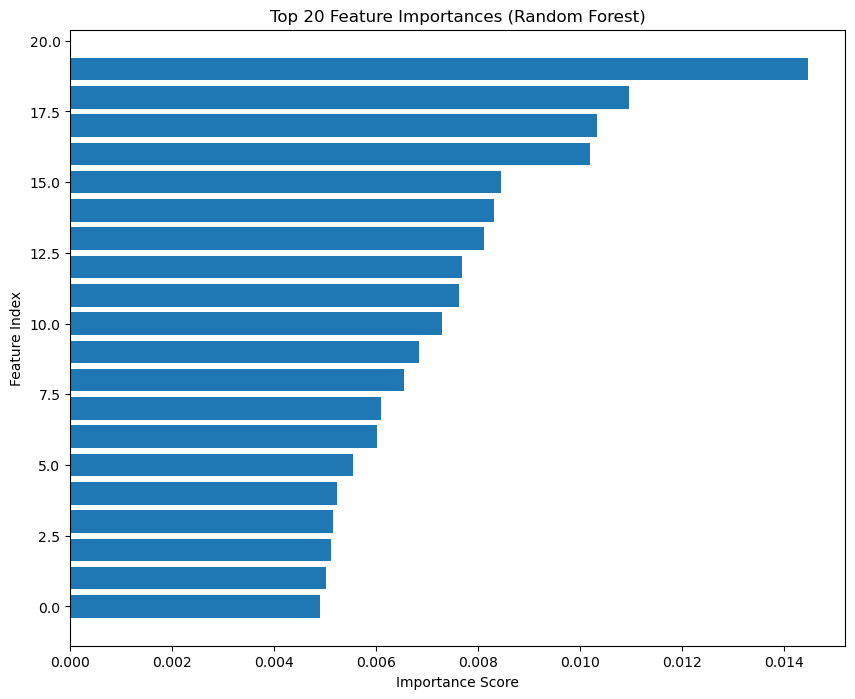

In [28]:
import matplotlib.pyplot as plt
import numpy as np

# Get feature importance from the Random Forest model
feature_importances = rf_model.feature_importances_

# Plot the top 20 important features
top_n = 20  # Adjust as needed
indices = np.argsort(feature_importances)[-top_n:]  # Indices of top features

plt.figure(figsize=(10, 8))
plt.barh(range(len(indices)), feature_importances[indices], align="center")
plt.title("Top 20 Feature Importances (Random Forest)")
plt.xlabel("Importance Score")
plt.ylabel("Feature Index")
plt.show()


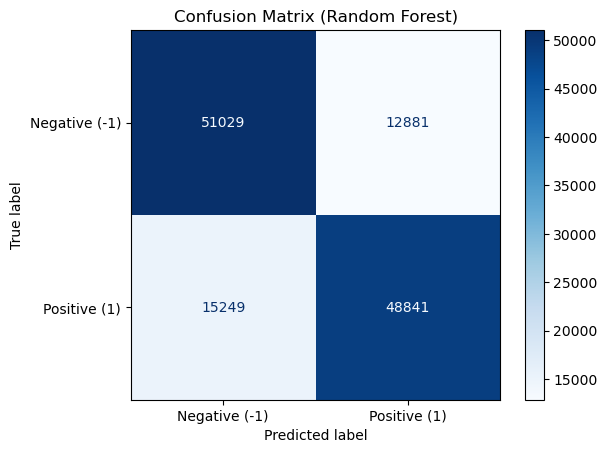

In [29]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Generate confusion matrix
cm = confusion_matrix(y_test, rf_model.predict(X_test))

# Plot confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Negative (-1)", "Positive (1)"])
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix (Random Forest)")
plt.show()


In [41]:
# Example new text samples
new_samples = ["this product is normal!"]

# Convert new samples to TF-IDF features
new_samples_tfidf = vectorizer.transform(new_samples)

# Predict sentiments using Random Forest
predictions = rf_model.predict(new_samples_tfidf)

# Print the raw predictions
print("Predicted Sentiments (Random Forest):", predictions)


Predicted Sentiments (Random Forest): [1]
